# Logistic Regression
对数据进行二分类的最直接有效的方法就是采用线性回归分类器，下面使用sklearn的LogisticRegressionCV处理数据，进行二分类

In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

## 生成数据
使用datasets的make_moons随机生成数据。</br>
其中X为200\*2的矩阵，y为100\*1的矩阵。X是数据，y是label。</br>
这里的最小二乘模型是：
$$
y = \omega_0 + \omega_1x_1 + \omega_2x_2
$$
<pre>
make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
Make two interleaving half circles

A simple toy dataset to visualize clustering and classification algorithms. Read more in the User Guide <sample_generators>.

Parameters
n_samples : int, optional (default=100) The total number of points generated.

shuffle : bool, optional (default=True) Whether to shuffle the samples.

noise : double or None (default=None) Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance or None (default) Determines random number generation for dataset shuffling and noise. Pass an int for reproducible output across multiple function calls. See Glossary <random_state>.

Returns
X : array of shape [n_samples, 2] The generated samples.

y : array of shape [n_samples] The integer labels (0 or 1) for class membership of each sample.
</pre>

In [2]:
def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

## 可视化
对每一个x进行预测

In [3]:
def visualize(X, y, clf):
    
    plot_decision_boundary(lambda x: clf.predict(x), X, y)
    

### 绘制图形

In [4]:
def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Logistic Regression")
    plt.show()

## 分类器
clf是一个训练好的线性分类模型。

In [5]:
def classify(X, y):
    clf = linear_model.LogisticRegressionCV()
    clf.fit(X, y)
    return clf

In [6]:
def main():
    X, y = generate_data()
    clf = classify(X, y)
    visualize(X, y, clf)
    print(X)
    print(y)

C:\Users\Administrator\AppData\Local\conda\conda\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


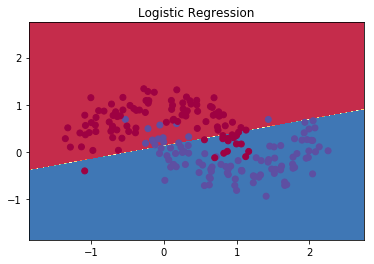

[[ 0.74346118  0.46465633]
 [ 1.65755662 -0.63203157]
 [-0.15878875  0.25584465]
 [-1.088752   -0.39694315]
 [ 1.768052   -0.25443213]
 [ 1.95416454 -0.12850579]
 [ 0.93694537  0.36597075]
 [ 0.88446589 -0.47595401]
 [ 0.80950246  0.3505231 ]
 [ 1.2278091  -0.64785108]
 [-0.38454276  0.50916381]
 [ 0.09252135 -0.31618454]
 [ 1.79531658 -0.32235591]
 [ 1.43861749 -0.15796611]
 [-0.82364866  0.86822754]
 [ 0.99633397  0.1731019 ]
 [ 0.66388701  0.94659669]
 [ 0.13229471 -0.26032619]
 [ 0.2482245   0.7860477 ]
 [-1.00392102  1.15207238]
 [ 2.08208438  0.00715606]
 [ 0.87081342 -0.4366643 ]
 [ 0.37268327  1.01743002]
 [ 1.26735927 -0.11813675]
 [-0.13270154  1.26653562]
 [ 0.20331     0.19519454]
 [ 1.98373996 -0.11222315]
 [ 1.82749513 -0.03085446]
 [-0.03857867  0.0838378 ]
 [ 0.03351023  0.63113817]
 [ 0.94193283  0.63204507]
 [-0.39131894  0.40925201]
 [ 0.88357043 -0.35868845]
 [-0.01141219  0.30437635]
 [ 0.75877114  0.76057045]
 [ 1.79414416  0.28323389]
 [ 0.56116634 -0.0330033 ]
 

In [7]:
if __name__ == "__main__":
    main()